In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import os
import nltk.corpus

import os

In [24]:
path = '/Users/clhcc/Downloads/Git/UC-Berkeley-Capstone-Project/Social Media Indicators/Tweet Sentiment/daily_summary.csv'
bitcoin_data = pd.read_csv('News-Sentiment.csv')
twitter_data = pd.read_csv(path)

In [25]:
df1 = twitter_data.rename(columns={'total_posts':'twitter_total_posts', 'positive':'positive_tweets', 'negative':'negative_tweets', 'neutral':'neutral_tweets', 'sentiment':'tweet_sentiment'})

In [22]:
import pandas as pd
from textblob import TextBlob
# Assuming your DataFrame is named df and the content column is named 'content'
df = bitcoin_data
# 1. Convert the date column to datetime format and extract the date part
df['date'] = pd.to_datetime(df['date']).dt.date

# 2. Calculate sentiment scores for each tweet
def sentiment_score(text):
    return TextBlob(str(text)).sentiment.polarity

df['sentiments'] = df['text'].apply(sentiment_score)

"""# Define a function to classify sentiment as positive or negative based on a given threshold
def classify_sentiment(score, threshold=0):
    if score > threshold:
        return 1
    elif score < threshold:
        return -1
    else:
        return 0

# Apply the function to classify each tweet's sentiment
df['sentiment_class'] = df['sentiment'].apply(classify_sentiment)

# Create new columns for positive, negative, and neutral posts
df['positive'] = df['sentiment_class'].apply(lambda x: 1 if x == 1 else 0)
df['negative'] = df['sentiment_class'].apply(lambda x: 1 if x == -1 else 0)
df['neutral'] = df['sentiment_class'].apply(lambda x: 1 if x == 0 else 0)"""

# 3. Group the data by date and calculate the sum of positive, negative, and neutral posts, the total number of posts, and the mean sentiment score
daily_summary = df.groupby('date').agg({
    'text': 'count',
    'sentiments': 'mean'
}).reset_index()

df2 = daily_summary.rename(columns={'text': 'news_text_count', 'sentiments':'news_sentiment'})

In [28]:
df1['date'] = pd.to_datetime(df1['date']).dt.date
df2['date'] = pd.to_datetime(df2['date']).dt.date

In [29]:
merged_tweets_news = df1.merge(df2, on='date', how='left')

In [30]:
merged_tweets_news

,date,twitter_total_posts,positive_tweets,negative_tweets,neutral_tweets,tweet_sentiment,news_text_count,news_sentiment
0,2021-10-01,861,319,77,467,0.097485,NaN,NaN
1,2021-10-02,998,332,111,556,0.070151,NaN,NaN
2,2021-10-03,1016,322,84,611,0.076430,NaN,NaN
3,2021-10-04,1520,466,198,856,0.068259,NaN,NaN
4,2021-10-05,1846,621,180,1045,0.078729,NaN,NaN
...,...,...,...,...,...,...,...,...
512,2023-02-25,382,129,44,210,0.079262,23.0,0.147738
513,2023-02-26,378,126,57,195,0.061385,18.0,0.038656
514,2023-02-27,500,176,73,251,0.066812,53.0,0.085788
515,2023-02-28,480,197,50,233,0.095058,61.0,0.015882


In [31]:
df.to_csv('merged_tweets_news', index=False)

/var/folders/lh/ylr7w7zx03n225gw_d00t80m0000gn/T/ipykernel_57687/970482978.py:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  filtered_df2 = df2[(df2['date'] >= pd.to_datetime(start_date)) & (df2['date'] <= pd.to_datetime(end_date))]


In [9]:
print(bitcoin_data['title'])

0        Allbridge to first begin repaying stuck bridge...
1        Bitcoin Hodl Patterns Indicate Cycle Shift to ...
2        ETH hits 7-month high ahead of Shanghai and Ca...
3        Marathon Digital posts quarterly record of 2,1...
4        Brazilian Finance Giant BTG Pactual to Issue a...
                               ...                        
18538    Cream Finance Suffers Another Exploit as Attac...
18539    French Central Bank's Blockchain Bond Trial Br...
18540    Facebook To Add 10,000 Jobs In EU For Metavers...
18541    Tech Crackdown Hasn't Halted Chinese Firms' Bl...
18542    Celo to Be Fastest EVM Chain by End of 2022, C...
Name: title, Length: 18543, dtype: object


In [10]:
bitcoin_data['title'] = bitcoin_data['title'].astype(str)

In [11]:
print(bitcoin_data.dtypes)

date     object
text     object
title    object
dtype: object


In [12]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [13]:
bitcoin_data.iloc[0,1]

'The compensation process is expected to start next week, starting with users who had funds on the bridge “shortly before the shutdown.”'

In [14]:
import re
import string

In [15]:
bitcoin_data.iloc[0,1]

'The compensation process is expected to start next week, starting with users who had funds on the bridge “shortly before the shutdown.”'

In [16]:
# Print the result
print(bitcoin_data)

                   date                                               text  \
0      05-04-2023 06:52  The compensation process is expected to start ...   
1      05-04-2023 06:19  On-chain analytics revealed a sentiment shift ...   
2      05-04-2023 05:09  Ether has broken the $1,900 resistance level f...   
3      05-04-2023 01:09  With a new quarterly production record, Marath...   
4      04-04-2023 23:49  The stablecoin BTG Dol will supposedly become ...   
...                 ...                                                ...   
18538  27-10-2021 15:17  Cream Finance (CREAM) suffered another flash l...   
18539  19-10-2021 13:39  Banque de France disclosed the results of its ...   
18540  18-10-2021 13:58  Advancing its project to become \x9caÂ\xa0meta...   
18541  15-10-2021 00:00  Chinese companies are still topping the blockc...   
18542  12-10-2021 20:00  Within a little more than a year, Celo aims to...   

                                                   title  
0   

In [17]:
###def remove_punctuation(tokens):
    ###return [token.translate(str.maketrans('', '', string.punctuation)) for token in tokens]

In [18]:
def remove_punctuation(text):
    return re.sub(f'[{string.punctuation}]', ' ', text)

In [19]:
###bitcoin_data['title'] = bitcoin_data['title'].apply(remove_punctuation)

In [20]:
bitcoin_data['title'] = bitcoin_data['title'].apply(remove_punctuation)

In [21]:
bitcoin_data.iloc[0,1]

'The compensation process is expected to start next week, starting with users who had funds on the bridge “shortly before the shutdown.”'

In [22]:
bitcoin_data.head(2)

,date,text,title
0,05-04-2023 06:52,The compensation process is expected to start ...,Allbridge to first begin repaying stuck bridge...
1,05-04-2023 06:19,On-chain analytics revealed a sentiment shift ...,Bitcoin Hodl Patterns Indicate Cycle Shift to ...


In [23]:
from nltk.tokenize import word_tokenize

# Define tokenization function
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Apply tokenization function to DataFrame column
bitcoin_data['tokenize'] = bitcoin_data['title'].apply(tokenize_text)

In [24]:
bitcoin_data.head(2)

,date,text,title,tokenize
0,05-04-2023 06:52,The compensation process is expected to start ...,Allbridge to first begin repaying stuck bridge...,"[Allbridge, to, first, begin, repaying, stuck,..."
1,05-04-2023 06:19,On-chain analytics revealed a sentiment shift ...,Bitcoin Hodl Patterns Indicate Cycle Shift to ...,"[Bitcoin, Hodl, Patterns, Indicate, Cycle, Shi..."


In [25]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /opt/conda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# Define a function to remove stop words
def remove_stop_words(tokens):
    return ' '.join([token for token in tokens if token.lower() not in stop_words])

# Apply the function to the 'text' column
bitcoin_data['tokenize'] = bitcoin_data['tokenize'].apply(remove_stop_words)

# Print the result
print(bitcoin_data.head(5))

               date                                               text  \
0  05-04-2023 06:52  The compensation process is expected to start ...   
1  05-04-2023 06:19  On-chain analytics revealed a sentiment shift ...   
2  05-04-2023 05:09  Ether has broken the $1,900 resistance level f...   
3  05-04-2023 01:09  With a new quarterly production record, Marath...   
4  04-04-2023 23:49  The stablecoin BTG Dol will supposedly become ...   

                                               title  \
0  Allbridge to first begin repaying stuck bridge...   
1  Bitcoin Hodl Patterns Indicate Cycle Shift to ...   
2  ETH hits 7 month high ahead of Shanghai and Ca...   
3  Marathon Digital posts quarterly record of 2 1...   
4  Brazilian Finance Giant BTG Pactual to Issue a...   

                                            tokenize  
0  Allbridge first begin repaying stuck bridge us...  
1  Bitcoin Hodl Patterns Indicate Cycle Shift Bul...  
2  ETH hits 7 month high ahead Shanghai Capella u... 

In [27]:
all_tokens = [token for text in bitcoin_data['tokenize'] for token in text.split()]
word_freq = nltk.FreqDist(all_tokens)
top_words = word_freq.most_common(100)
print("Top words:", top_words)

Top words: [('Bitcoin', 4394), ('Crypto', 3456), ('’', 2220), ('Ethereum', 1566), ('BTC', 1373), ('Price', 1285), ('crypto', 1280), ('\\x93', 1160), ('price', 997), ('NFT', 925), ('Report', 840), ('FTX', 713), ('US', 695), ('Prediction', 659), ('Binance', 627), ('New', 623), ('ETH', 618), ('1', 571), ('‘', 533), ('NFTs', 524), ('3', 486), ('Million', 485), ('Market', 467), ('CEO', 454), ('XRP', 442), ('Web3', 441), ('DeFi', 439), ('—', 429), ('blockchain', 403), ('News', 388), ('Blockchain', 384), ('Says', 382), ('2022', 378), ('Coinbase', 374), ('5', 374), ('market', 373), ('says', 363), ('2', 359), ('new', 356), ('Bank', 353), ('Terra', 350), ('Metaverse', 333), ('Buy', 325), ('SEC', 325), ('USD', 325), ('Trading', 314), ('Digital', 309), ('ADA', 297), ('BNB', 294), ('000', 289), ('Exchange', 288), ('2023', 283), ('DOGE', 283), ('Solana', 278), ('Today', 245), ('SOL', 232), ('Finance', 231), ('Merge', 230), ('10', 223), ('Twitter', 222), ('South', 222), ('Could', 219), ('Launches', 2

In [28]:
import matplotlib.pyplot as plt

In [29]:
from wordcloud import WordCloud

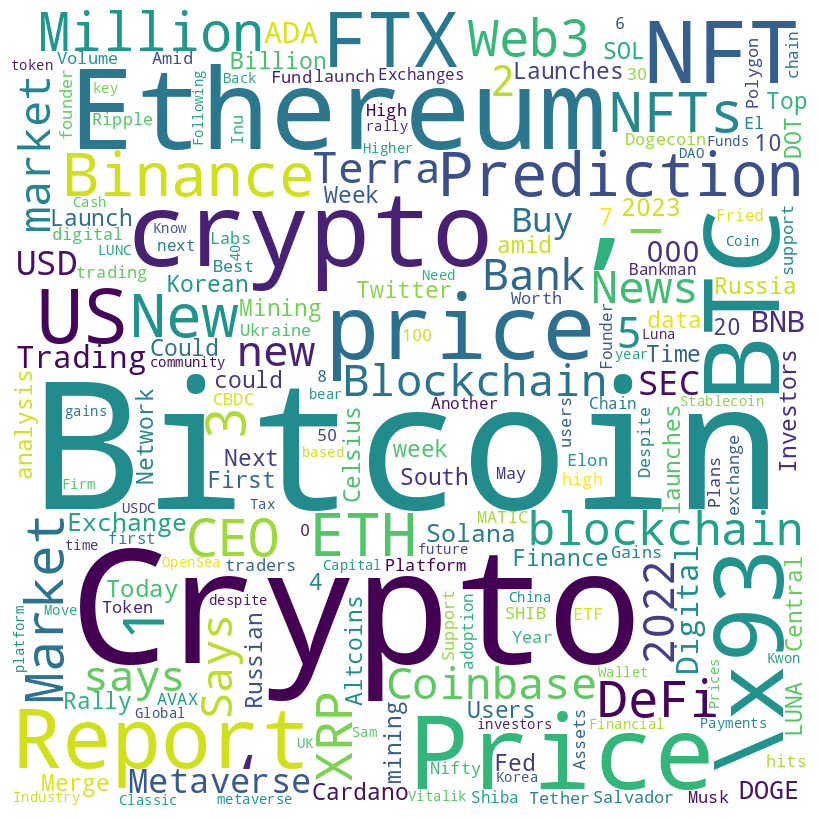

In [30]:
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [31]:
!pip install textblob
from textblob import TextBlob

In [32]:
def get_sentiment_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [33]:
bitcoin_data['sentiment'] = bitcoin_data['tokenize'].apply(get_sentiment_score)

In [34]:
bitcoin_data.head(2)

,date,text,title,tokenize,sentiment
0,05-04-2023 06:52,The compensation process is expected to start ...,Allbridge to first begin repaying stuck bridge...,Allbridge first begin repaying stuck bridge us...,0.25
1,05-04-2023 06:19,On-chain analytics revealed a sentiment shift ...,Bitcoin Hodl Patterns Indicate Cycle Shift to ...,Bitcoin Hodl Patterns Indicate Cycle Shift Bul...,0.00


In [35]:
def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

bitcoin_data['polarity'] = bitcoin_data['tokenize'].apply(get_sentiment_polarity)

In [36]:
bitcoin_data.head(2)

,date,text,title,tokenize,sentiment,polarity
0,05-04-2023 06:52,The compensation process is expected to start ...,Allbridge to first begin repaying stuck bridge...,Allbridge first begin repaying stuck bridge us...,0.25,0.25
1,05-04-2023 06:19,On-chain analytics revealed a sentiment shift ...,Bitcoin Hodl Patterns Indicate Cycle Shift to ...,Bitcoin Hodl Patterns Indicate Cycle Shift Bul...,0.00,0.00


In [37]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

bitcoin_data['subjectivity'] = bitcoin_data['tokenize'].apply(get_subjectivity)

In [38]:
bitcoin_data.head(2)

,date,text,title,tokenize,sentiment,polarity,subjectivity
0,05-04-2023 06:52,The compensation process is expected to start ...,Allbridge to first begin repaying stuck bridge...,Allbridge first begin repaying stuck bridge us...,0.25,0.25,0.333333
1,05-04-2023 06:19,On-chain analytics revealed a sentiment shift ...,Bitcoin Hodl Patterns Indicate Cycle Shift to ...,Bitcoin Hodl Patterns Indicate Cycle Shift Bul...,0.00,0.00,0.000000


In [39]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

bitcoin_data['sentiment'] = bitcoin_data['tokenize'].apply(get_sentiment)
bitcoin_data['rating'] = bitcoin_data['sentiment'].apply(lambda x: 1 if x == 'Positive' else (0 if x == 'Neutral' else -1))

In [40]:
bitcoin_data.head(2)

,date,text,title,tokenize,sentiment,polarity,subjectivity,rating
0,05-04-2023 06:52,The compensation process is expected to start ...,Allbridge to first begin repaying stuck bridge...,Allbridge first begin repaying stuck bridge us...,Positive,0.25,0.333333,1
1,05-04-2023 06:19,On-chain analytics revealed a sentiment shift ...,Bitcoin Hodl Patterns Indicate Cycle Shift to ...,Bitcoin Hodl Patterns Indicate Cycle Shift Bul...,Neutral,0.00,0.000000,0


In [41]:
bitcoin_data.to_csv('Bitcoin_Articles_April.csv', index=False)

In [42]:
positive_count = (bitcoin_data['sentiment'] == 'Positive').sum()
negative_count = (bitcoin_data['sentiment'] == 'Negative').sum()
neutral_count = (bitcoin_data['sentiment'] == 'Neutral').sum()
all_articles = positive_count+negative_count+neutral_count

print("Number of positive sentiments:", positive_count)
print("Number of negative sentiments:", negative_count)
print("Number of neutral sentiments:", neutral_count)
print("Number of articles:", all_articles)

Number of positive sentiments: 4570
Number of negative sentiments: 2332
Number of neutral sentiments: 11641
Number of articles: 18543


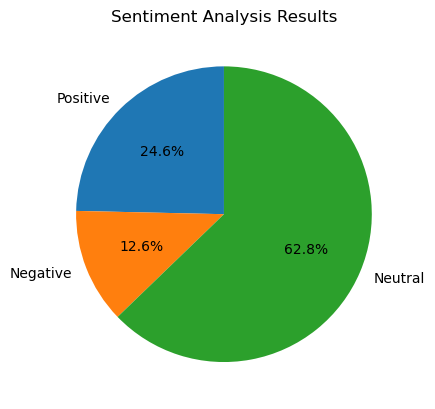

In [43]:
import matplotlib.pyplot as plt

# Example data
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_count,negative_count ,neutral_count]

# Create a pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
ax1.set_title('Sentiment Analysis Results')

# Show the chart
plt.show()

In [44]:
# convert the date column to datetime
bitcoin_data['date'] = pd.to_datetime(bitcoin_data['date'], format='%d-%m-%Y %H:%M')

# extract only the date part
bitcoin_data['date'] = bitcoin_data['date'].apply(lambda x: x.date())

In [45]:
bitcoin_data.head(2)

,date,text,title,tokenize,sentiment,polarity,subjectivity,rating
0,2023-04-05,The compensation process is expected to start ...,Allbridge to first begin repaying stuck bridge...,Allbridge first begin repaying stuck bridge us...,Positive,0.25,0.333333,1
1,2023-04-05,On-chain analytics revealed a sentiment shift ...,Bitcoin Hodl Patterns Indicate Cycle Shift to ...,Bitcoin Hodl Patterns Indicate Cycle Shift Bul...,Neutral,0.00,0.000000,0


In [46]:
unique_dates = bitcoin_data['date'].unique()
unique_dates

array([datetime.date(2023, 4, 5), datetime.date(2023, 4, 4),
       datetime.date(2023, 4, 3), datetime.date(2023, 4, 2),
       datetime.date(2023, 4, 1), datetime.date(2023, 3, 31),
       datetime.date(2023, 3, 30), datetime.date(2023, 3, 29),
       datetime.date(2023, 3, 28), datetime.date(2023, 3, 27),
       datetime.date(2023, 3, 26), datetime.date(2023, 3, 25),
       datetime.date(2023, 3, 24), datetime.date(2023, 3, 23),
       datetime.date(2023, 3, 22), datetime.date(2023, 3, 21),
       datetime.date(2023, 3, 20), datetime.date(2023, 3, 19),
       datetime.date(2023, 3, 18), datetime.date(2023, 3, 17),
       datetime.date(2023, 3, 16), datetime.date(2023, 3, 15),
       datetime.date(2023, 3, 14), datetime.date(2023, 3, 13),
       datetime.date(2023, 3, 12), datetime.date(2023, 3, 11),
       datetime.date(2023, 3, 10), datetime.date(2023, 3, 9),
       datetime.date(2023, 3, 8), datetime.date(2023, 3, 7),
       datetime.date(2023, 3, 6), datetime.date(2023, 3, 5),
  

In [47]:
bitcoin_data['date'] = pd.to_datetime(bitcoin_data['date'])
bitcoin_data['date_only'] = bitcoin_data['date'].dt.date
bitcoin_data.head(2)

,date,text,title,tokenize,sentiment,polarity,subjectivity,rating,date_only
0,2023-04-05,The compensation process is expected to start ...,Allbridge to first begin repaying stuck bridge...,Allbridge first begin repaying stuck bridge us...,Positive,0.25,0.333333,1,2023-04-05
1,2023-04-05,On-chain analytics revealed a sentiment shift ...,Bitcoin Hodl Patterns Indicate Cycle Shift to ...,Bitcoin Hodl Patterns Indicate Cycle Shift Bul...,Neutral,0.00,0.000000,0,2023-04-05


In [48]:
bitcoin_data['date_only'] = bitcoin_data['date'].dt.date
bitcoin_data.head(2)

,date,text,title,tokenize,sentiment,polarity,subjectivity,rating,date_only
0,2023-04-05,The compensation process is expected to start ...,Allbridge to first begin repaying stuck bridge...,Allbridge first begin repaying stuck bridge us...,Positive,0.25,0.333333,1,2023-04-05
1,2023-04-05,On-chain analytics revealed a sentiment shift ...,Bitcoin Hodl Patterns Indicate Cycle Shift to ...,Bitcoin Hodl Patterns Indicate Cycle Shift Bul...,Neutral,0.00,0.000000,0,2023-04-05


In [49]:
del bitcoin_data['date']

In [50]:
avg_sentiment = bitcoin_data.groupby(['date_only','polarity', 'rating','subjectivity']).mean()

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3505: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [51]:
avg_sentiment

Empty DataFrame
Columns: []
Index: [(2021-10-12, 0.0, 0, 0.0), (2021-10-15, 0.0, 0, 0.0), (2021-10-18, 0.0, 0, 0.0), (2021-10-19, 0.08333333333333333, 1, 0.19444444444444442), (2021-10-27, -0.6, -1, 0.7), (2021-10-29, -0.05454545454545454, -1, 0.3515151515151515), (2021-11-01, -0.1, -1, 0.7), (2021-11-02, -0.5, -1, 0.8), (2021-11-02, 0.0, 0, 0.0), (2021-11-03, 0.0, 0, 0.0), (2021-11-04, -0.14999999999999997, -1, 0.75), (2021-11-04, 0.0, 0, 0.0), (2021-11-04, 0.0, 0, 0.5), (2021-11-05, -0.3, -1, 0.1), (2021-11-05, -0.2, -1, 0.3), (2021-11-05, -0.05, -1, 0.2), (2021-11-05, 0.0, 0, 0.0), (2021-11-05, 0.0, 0, 0.1), (2021-11-05, 0.0, 0, 1.0), (2021-11-05, 0.16, 1, 0.5399999999999999), (2021-11-06, 0.0, 0, 0.0), (2021-11-08, 0.0, 0, 0.0), (2021-11-08, 0.0625, 1, 0.5), (2021-11-08, 0.22727272727272727, 1, 0.5454545454545454), (2021-11-08, 0.8, 1, 0.9), (2021-11-08, 0.8, 1, 1.0), (2021-11-09, 0.0, 0, 0.0), (2021-11-09, 0.0, 0, 0.125), (2021-11-09, 0.02777777777777779, 1, 0.2722222222222222), (2021-11-09, 0.13636363636363635, 1, 0.4772727272727273), (2021-11-09, 0.16666666666666666, 1, 0.3333333333333333), (2021-11-09, 0.25, 1, 0.3333333333333333), (2021-11-10, -0.07500000000000001, -1, 0.45), (2021-11-10, 0.0, 0, 0.0), (2021-11-10, 0.0, 0, 0.06666666666666667), (2021-11-10, 0.0, 0, 0.08095238095238096), (2021-11-10, 0.03125, 1, 0.25), (2021-11-10, 0.16, 1, 0.5399999999999999), (2021-11-10, 0.25, 1, 0.5), (2021-11-11, -0.5, -1, 0.3), (2021-11-11, -0.08333333333333333, -1, 0.23333333333333334), (2021-11-11, 0.0, 0, 0.0), (2021-11-11, 0.0, 0, 0.45), (2021-11-12, -0.1, -1, 0.6), (2021-11-12, 0.0, 0, 0.0), (2021-11-12, 0.0, 0, 1.0), (2021-11-12, 0.16, 1, 0.5399999999999999), (2021-11-12, 0.25, 1, 0.5), (2021-11-13, 0.13636363636363635, 1, 0.45454545454545453), (2021-11-14, 0.0, 0, 0.0), (2021-11-15, -0.2, -1, 0.3), (2021-11-15, 0.0, 0, 0.0), (2021-11-15, 0.0, 0, 0.1), (2021-11-15, 0.16, 1, 0.5399999999999999), (2021-11-15, 0.25, 1, 0.25), (2021-11-15, 0.3, 1, 0.9), (2021-11-16, 0.0, 0, 0.0), (2021-11-16, 0.0, 0, 0.125), (2021-11-16, 0.2, 1, 0.30000000000000004), (2021-11-16, 0.21666666666666665, 1, 0.36666666666666664), (2021-11-17, -0.8, -1, 0.9), (2021-11-17, -0.15000000000000002, -1, 0.19999999999999998), (2021-11-17, -0.1, -1, 0.6), (2021-11-17, 0.0, 0, 0.0), (2021-11-17, 0.0, 0, 1.0), (2021-11-18, -0.5, -1, 0.9), (2021-11-18, -0.23333333333333334, -1, 0.2833333333333333), (2021-11-18, 0.0, 0, 0.0), (2021-11-18, 0.05, 1, 0.30000000000000004), (2021-11-18, 0.13636363636363635, 1, 0.45454545454545453), (2021-11-18, 0.25, 1, 0.5), (2021-11-19, 0.0, 0, 0.0), (2021-11-19, 0.0, 0, 0.3), (2021-11-19, 0.13636363636363635, 1, 0.45454545454545453), (2021-11-19, 0.19166666666666665, 1, 0.5666666666666667), (2021-11-19, 0.2, 1, 0.6), (2021-11-19, 0.25, 1, 0.25), (2021-11-19, 0.3, 1, 0.1), (2021-11-20, 0.0, 0, 0.0), (2021-11-22, -0.1, -1, 0.6), (2021-11-22, 0.0, 0, 0.0), (2021-11-22, 0.0, 0, 0.0625), (2021-11-22, 0.0, 0, 0.25), (2021-11-22, 0.3181818181818182, 1, 0.5397727272727273), (2021-11-22, 0.5, 1, 0.5), (2021-11-23, 0.0, 0, 0.0), (2021-11-23, 0.0, 0, 0.75), (2021-11-23, 0.13636363636363635, 1, 0.45454545454545453), (2021-11-23, 0.225, 1, 0.6166666666666667), (2021-11-23, 0.26666666666666666, 1, 0.4666666666666666), (2021-11-24, -0.25, -1, 0.4), (2021-11-24, 0.0, 0, 0.0), (2021-11-24, 0.0, 0, 0.375), (2021-11-24, 0.25, 1, 0.5), (2021-11-24, 0.3, 1, 0.1), (2021-11-25, -0.5, -1, 0.5), (2021-11-25, -0.3888888888888889, -1, 0.8333333333333334), (2021-11-25, 0.0, 0, 0.0), (2021-11-25, 0.25, 1, 0.5), (2021-11-25, 0.4, 1, 0.8), ...]

[8145 rows x 0 columns]

In [55]:
df = pd.DataFrame(avg_sentiment)

df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8145 entries, (datetime.date(2021, 10, 12), 0.0, 0, 0.0) to (datetime.date(2023, 4, 5), 0.25, 1, 0.3333333333333333)
Empty DataFrame

In [53]:
bitcoin_price = pd.read_csv('BTC_Price.csv')
bitcoin_volume = pd.read_csv('BTC_Volume.csv')

#number of rows in bitcoin_volume dataframe
num_rows = len(bitcoin_volume['Volume'])
print(f"The 'volume' column has {num_rows} rows.")

#index of bitcoin_volume dataframe
index = bitcoin_volume.index
print(f"The index of the Bitcoin_Volume is:\n{index}")

#number of rows in bitcoin_price dataframe
num_rows = len(bitcoin_price['Price'])
print(f"The 'price' column has {num_rows} rows.")

#index of bitcoin_volume dataframe
index = bitcoin_price.index
print(f"The index of the Bitcoin_Price is:\n{index}")

index = df.index
print(f"The index of df is:\n{index}")

The 'volume' column has 7 rows.
The index of the Bitcoin_Volume is:
RangeIndex(start=0, stop=7, step=1)
The 'price' column has 7 rows.
The index of the Bitcoin_Price is:
RangeIndex(start=0, stop=7, step=1)
The index of df is:
MultiIndex([(2021-10-12,                  0.0,  0,                 0.0),
            (2021-10-15,                  0.0,  0,                 0.0),
            (2021-10-18,                  0.0,  0,                 0.0),
            (2021-10-19,  0.08333333333333333,  1, 0.19444444444444442),
            (2021-10-27,                 -0.6, -1,                 0.7),
            (2021-10-29, -0.05454545454545454, -1,  0.3515151515151515),
            (2021-11-01,                 -0.1, -1,                 0.7),
            (2021-11-02,                 -0.5, -1,                 0.8),
            (2021-11-02,                  0.0,  0,                 0.0),
            (2021-11-03,                  0.0,  0,                 0.0),
            ...
            (2023-04-04,  0.

In [54]:
bitcoin_volume.index = df.index
df['Bitcoin_Volume'] = bitcoin_volume

bitcoin_price.index = df.index
df['Bitcoin_Price'] = bitcoin_price

print(df)

ValueError: Length mismatch: Expected axis has 7 elements, new values have 8145 elements

In [ ]:
df['Log_Volume'] = df['Bitcoin_Volume'].apply(np.log)
df['Log_Price'] = df['Bitcoin_Price'].apply(np.log)
print(df)

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 8))

# Plot for Bitcoin_Price
ax1.plot(df.index, df['Log_Price'], color='b')
ax1.set_ylabel('Price')

# Plot for Bitcoin_Volume
ax2.bar(df.index, df['Log_Volume'], color='g')
ax2.set_ylabel('Volume')

# Plot for rating
ax3.plot(df.index, df['rating'], color='r')
ax3.set_ylabel('Sentiment')

# Add title and axis labels
fig.suptitle('Bitcoin Price, Volume, and Sentiment')
ax3.set_xlabel('Date')

plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

# Plot Bitcoin_Price as a line plot
ax.plot(df.index, df['Log_Price'], label='Price', color='blue')

# Plot Bitcoin_Volume as a bar plot with a secondary y-axis
ax.bar(df.index, df['Log_Volume'], label='Volume', color='green', alpha=0.3)
ax.set_ylabel('Price')
ax.tick_params(axis='y', labelcolor='blue')

ax2 = ax.twinx()  # create a secondary y-axis

# Plot rating as a line plot on the secondary y-axis
ax2.plot(df.index, df['rating'], label='Sentiment', color='red')
ax2.set_ylabel('Sentiment')
ax2.tick_params(axis='y', labelcolor='red')

# Add a legend and title
ax.legend(loc='upper left')
ax.set_title('Bitcoin Price, Volume, and Sentiment')

plt.show()